In [63]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import random



## 1. Preperation

Define a custome style for consotent look for all graphs

In [ ]:
Colors = ['#8c510a','#bf812d','#dfc27d','#f6e8c3','#c7eae5','#80cdc1','#35978f','#01665e']


In [68]:

Colors = ['#4393c3', '#f4a582','#92c5de','#d6604d', '#2166ac', '#d1e5f0']
Colors = Colors


plt.style.use('seaborn-v0_8-white')  # Clean white background, no grey
plt.rcParams.update({
    'figure.figsize': (11, 7),  # Slightly larger, elegant proportions
    'font.family': 'sans-serif',  # Professional typography
    'font.sans-serif': ['Times New Roman', 'Arial', 'Helvetica'],  # Serif + sans-serif options
    'font.size': 12,  # Base font size
    'axes.labelsize': 12,  # Axis labels
    'axes.titlesize': 16,  # Larger, bold titles for impact
    'axes.titleweight': 'bold',  # Emphasize titles
    'axes.grid': True,  # Subtle grid for precision
    'grid.alpha': 0.2,  # Lighter grid for elegance
    'grid.linestyle': '--',  # Dashed grid for sophistication
    'axes.edgecolor': '#333333',  # Darker grey for contrast
    'axes.linewidth': 1.2,  # Slightly thicker lines
    'lines.linewidth': 2.2,  # Enhanced line thickness
    'lines.markeredgewidth': 1.0,  # Crisp marker edges
    'legend.fontsize': 11,  # Slightly larger legend text
    'legend.frameon': True,  # Elegant framed legend
    'legend.framealpha': 0.9,  # Near-opaque frame
    'legend.edgecolor': '#444444',  # Darker legend border
    'xtick.labelsize': 11,  # Enhanced tick readability
    'ytick.labelsize': 11,  # Enhanced tick readability
    'xtick.direction': 'out',  # Outward ticks for clarity
    'ytick.direction': 'out',  # Outward ticks for clarity
    'xtick.major.size': 6,  # Larger tick marks
    'ytick.major.size': 6,  # Larger tick marks
    'savefig.dpi': 600,  # Ultra-high resolution for publication
    'savefig.bbox': 'tight',  # Optimized layout
    'savefig.pad_inches': 0.1  # Minimal padding
})

# Apply Seaborn context with custom palette
sns.set_context("paper", font_scale=1.2)  # Academic paper style, slightly larger
sns.set_palette(Colors)  # Use shuffled custom pastel palette

# Add subtle figure enhancements
plt.rcParams['figure.facecolor'] = 'white'  # Explicitly ensure white background
plt.rcParams['axes.facecolor'] = 'white'  # White plot area
plt.rcParams['legend.loc'] = 'best'  # Optimal legend placement


Read Date

In [2]:
parks_gdf = gpd.read_file('Data/Riyadh_parks_with_all_variables_raw.geojson')
print("Loaded parks_gdf with columns:", parks_gdf.columns) 

Loaded parks_gdf with columns: Index(['osm_id', 'OBJECTID', 'FEATURE_ANAME', 'MUNICIPALITY', 'DISTRICT',
       'WALKING_TRACK', 'GREEN_AREAS', 'LAYERID', 'LAYERANAME', 'Validation',
       ...
       'lst_reduction_tval_LSI', 'lst_reduction_sig_LSI',
       'lst_reduction_coef_building_density',
       'lst_reduction_tval_building_density',
       'lst_reduction_sig_building_density',
       'lst_reduction_coef_building_proximity',
       'lst_reduction_tval_building_proximity',
       'lst_reduction_sig_building_proximity', 'lst_reduction_localR2_proxy',
       'geometry'],
      dtype='object', length=132)


## 2. General Statistics

### Area related exploration

In [28]:
area_m2 = parks_gdf['area_m2']

In [41]:
# Park size distribution
area_m2 = parks_gdf['area_m2']
median_area = np.median(area_m2)
q25, q75 = np.percentile(area_m2, [25, 75])
large_parks = parks_gdf[area_m2 > 15000]  # 15,000 m² = 1.5 hectares
large_park_pct = len(large_parks) / len(parks_gdf) * 100

print(f"Median park area: {median_area:,.0f} m²")
print(f"Interquartile range (IQR): {q25:,.0f} - {q75:,.0f} m²")
print(f"Parks >15,000 m²: {large_park_pct:.1f}%")

Median park area: 5,085 m²
Interquartile range (IQR): 2,927 - 9,996 m²
Parks >15,000 m²: 16.5%


In [71]:
area_stats = {
    'Min': np.min(area_m2),
    'Max': np.max(area_m2),
    'Mean': np.mean(area_m2),
    'Median': np.median(area_m2),
    'Std Dev': np.std(area_m2),
    'IQR': np.percentile(area_m2, 75) - np.percentile(area_m2, 25),
    'Q1 (25%)': np.percentile(area_m2, 25),
    'Q3 (75%)': np.percentile(area_m2, 75),
    '90th %ile': np.percentile(area_m2, 90)
}

#  Size category distribution
size_bins = [0, 1000, 5000, 10000, 15000, 30000, 50000, np.inf]
size_labels = ['<1k', '1k-5k', '5k-10k', '10k-15k', '15k-30k', '30k-50k', '>50k']
parks_gdf['size_category'] = pd.cut(area_m2, bins=size_bins, labels=size_labels)
size_distribution = parks_gdf['size_category'].value_counts(normalize=True).sort_index() * 100

#  Print comprehensive statistics
print("="*50)
print("Park Area Statistics (m²)")
print("="*50)
for stat, value in area_stats.items():
    print(f"{stat:<10}: {value:,.0f} m²")

print("\nSize Category Distribution:")
for size, pct in size_distribution.items():
    print(f"- {size} m²: {pct:.1f}% of parks")


Park Area Statistics (m²)
Min       : 986 m²
Max       : 258,130 m²
Mean      : 14,953 m²
Median    : 5,085 m²
Std Dev   : 34,704 m²
IQR       : 7,069 m²
Q1 (25%)  : 2,927 m²
Q3 (75%)  : 9,996 m²
90th %ile : 30,759 m²

Size Category Distribution:
- <1k m²: 0.5% of parks
- 1k-5k m²: 47.9% of parks
- 5k-10k m²: 26.3% of parks
- 10k-15k m²: 8.8% of parks
- 15k-30k m²: 6.2% of parks
- 30k-50k m²: 3.6% of parks
- >50k m²: 6.7% of parks


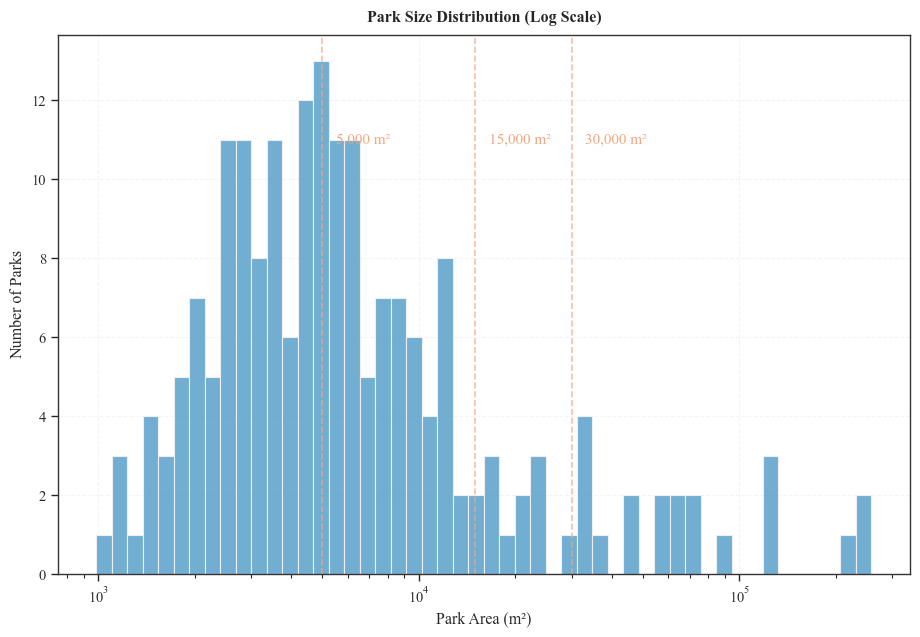

In [77]:
# Detailed histogram with log scale
fig, ax1 = plt.subplots(figsize=(11, 7))  # Use global figsize
sns.histplot(data=parks_gdf, x='area_m2', bins=50, log_scale=True, ax=ax1, color=Colors[0])  # Use first color
ax1.set_title('Park Size Distribution (Log Scale)', pad=10)
ax1.set_xlabel('Park Area (m²)')
ax1.set_ylabel('Number of Parks')
ax1.grid(True, linestyle='--', alpha=0.2)  # Match global grid style

# Add key thresholds
thresholds = [5000, 15000, 30000]
for threshold in thresholds:
    ax1.axvline(threshold, color=Colors[1], linestyle='--', alpha=0.7)  # Use second color for contrast
    ax1.text(threshold * 1.1, ax1.get_ylim()[1] * 0.8, f'{threshold:,.0f} m²', 
             fontsize=11, color=Colors[1], ha='left')

plt.title('Park Size Distribution (Log Scale)', pad=10)  # Redundant if ax1.set_title works
# plt.savefig('park_size_distribution_m2.png', dpi=600, bbox_inches='tight')  # Comment out export
plt.show()

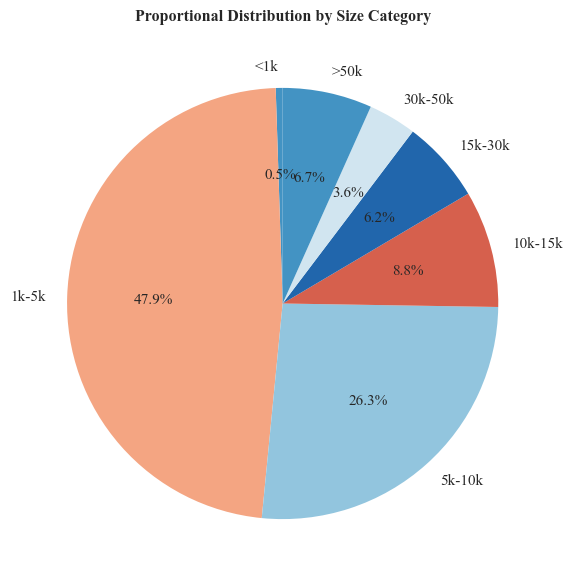

In [78]:

# Size category pie chart
fig, ax2 = plt.subplots(figsize=(11, 7))  # Use global figsize
colors = Colors[:len(size_distribution)]  # Use palette up to number of categories
ax2.pie(size_distribution, labels=size_distribution.index, autopct='%1.1f%%', 
        startangle=90, colors=colors, textprops={'fontsize': 11})
ax2.set_title('Proportional Distribution by Size Category', pad=10)

plt.title('Proportional Distribution by Size Category', pad=10)  # Redundant if ax2.set_title works
# plt.savefig('area_vs_cooling.png', dpi=600)  # Comment out export (note: filename mismatch from original)
plt.show()

### LSI related exploration

In [81]:
# Descriptive Analysis of LSI
lsi_stats = parks_gdf['LSI'].describe()
print("LSI Descriptive Statistics:")
print(lsi_stats)
print(f"Range: {parks_gdf['LSI'].min():.2f} to {parks_gdf['LSI'].max():.2f}")
print(f"Ideal values: 1.00 (circle), 1.13 (square); Observed max (5.76) indicates complex shapes.")


LSI Descriptive Statistics:
count    194.000000
mean       1.218093
std        0.180563
min        1.060000
25%        1.130000
50%        1.170000
75%        1.230000
max        2.900000
Name: LSI, dtype: float64
Range: 1.06 to 2.90
Ideal values: 1.00 (circle), 1.13 (square); Observed max (5.76) indicates complex shapes.


LSI Descriptive Statistics:
count    194.000000
mean       1.218093
std        0.180563
min        1.060000
25%        1.130000
50%        1.170000
75%        1.230000
max        2.900000
Name: LSI, dtype: float64
Range: 1.06 to 2.90
Ideal values: 1.00 (circle), 1.13 (square); Observed max (5.76) indicates complex shapes.


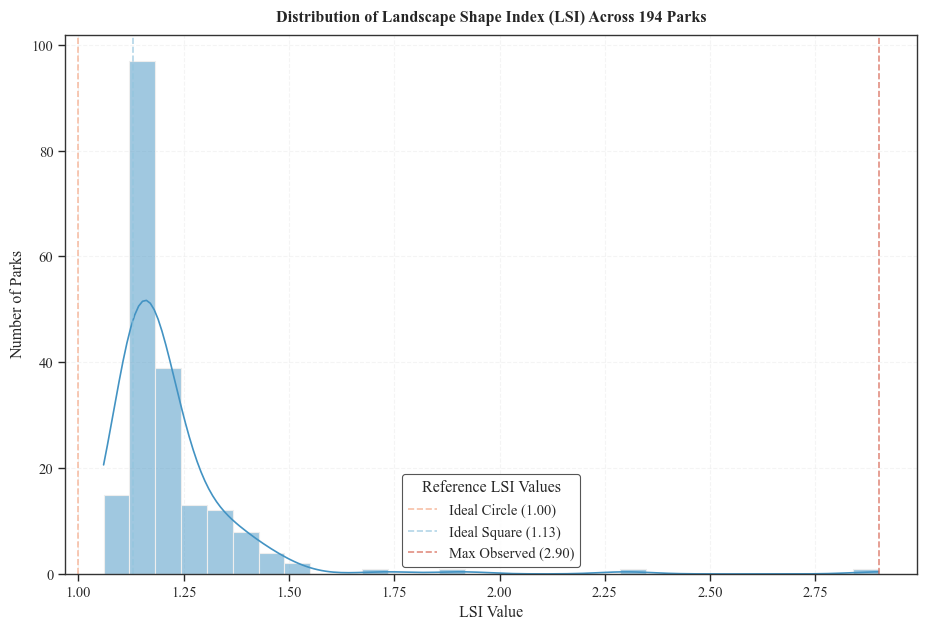

In [90]:
# Descriptive Analysis of LSI
lsi_stats = parks_gdf['LSI'].describe()
print("LSI Descriptive Statistics:")
print(lsi_stats)
print(f"Range: {parks_gdf['LSI'].min():.2f} to {parks_gdf['LSI'].max():.2f}")
print(f"Ideal values: 1.00 (circle), 1.13 (square); Observed max (5.76) indicates complex shapes.")

# Histogram of LSI
fig, ax = plt.subplots(figsize=(11, 7))
sns.histplot(data=parks_gdf, x='LSI', bins=30, color=Colors[0], kde=True, ax=ax)
ax.set_title('Distribution of Landscape Shape Index (LSI) Across 194 Parks', pad=10)
ax.set_xlabel('LSI Value')
ax.set_ylabel('Number of Parks')
ax.grid(True, linestyle='--', alpha=0.2)
# Highlight ideal and observed extreme values
ax.axvline(1.00, color=Colors[1], linestyle='--', alpha=0.7, label='Ideal Circle (1.00)')
ax.axvline(1.13, color=Colors[2], linestyle='--', alpha=0.7, label='Ideal Square (1.13)')
ax.axvline(2.90, color=Colors[3], linestyle='--', alpha=0.7, label='Max Observed (2.90)')
ax.legend(title='Reference LSI Values', loc='best')
# plt.savefig('lsi_distribution.png', dpi=600, bbox_inches='tight')  # Comment out export
plt.show()

### NDVI and PISI related exploration

In [84]:
# Descriptive Statistics
ndvi = parks_gdf['ndvi_mean']
pisi = parks_gdf['pisi_mean']

ndvi_stats = ndvi.describe()
pisi_stats = pisi.describe()
print("NDVI Descriptive Statistics:")
print(ndvi_stats)
print(f"Range: {ndvi.min():.3f} to {ndvi.max():.3f}")
print("\nPISI Descriptive Statistics:")
print(pisi_stats)
print(f"Range: {pisi.min():.3f} to {pisi.max():.3f}")

NDVI Descriptive Statistics:
count    194.000000
mean       0.149629
std        0.035262
min        0.056360
25%        0.126020
50%        0.147426
75%        0.172987
max        0.235770
Name: ndvi_mean, dtype: float64
Range: 0.056 to 0.236

PISI Descriptive Statistics:
count    194.000000
mean      -0.173575
std        0.069084
min       -0.376677
25%       -0.220448
50%       -0.177248
75%       -0.127368
max        0.045596
Name: pisi_mean, dtype: float64
Range: -0.377 to 0.046


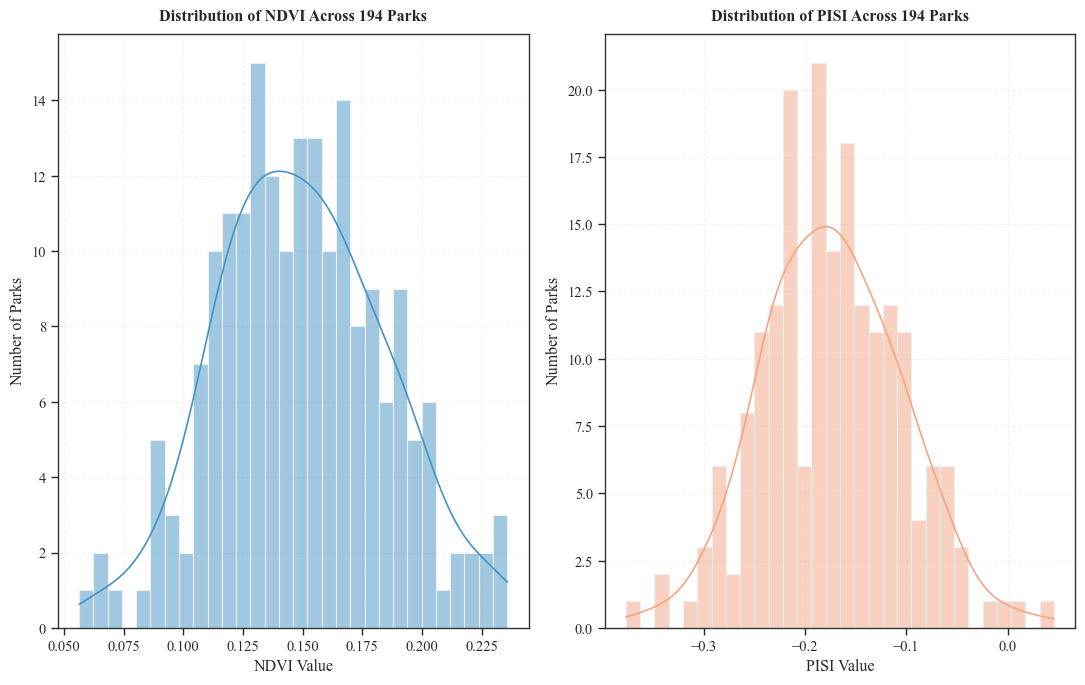

In [92]:
# Histograms
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 7))
sns.histplot(data=parks_gdf, x='ndvi_mean', bins=30, color=Colors[0], kde=True, ax=ax1)
ax1.set_title('Distribution of NDVI Across 194 Parks', pad=10)
ax1.set_xlabel('NDVI Value')
ax1.set_ylabel('Number of Parks')
ax1.grid(True, linestyle='--', alpha=0.2)

sns.histplot(data=parks_gdf, x='pisi_mean', bins=30, color=Colors[1], kde=True, ax=ax2)
ax2.set_title('Distribution of PISI Across 194 Parks', pad=10)
ax2.set_xlabel('PISI Value')
ax2.set_ylabel('Number of Parks')
ax2.grid(True, linestyle='--', alpha=0.2)

plt.tight_layout()
# plt.savefig('ndvi_pisi_distributions.png', dpi=600, bbox_inches='tight')  # Comment out export
plt.show()

PISI Descriptive Statistics:
count    194.000000
mean      -0.173575
std        0.069084
min       -0.376677
25%       -0.220448
50%       -0.177248
75%       -0.127368
max        0.045596
Name: pisi_mean, dtype: float64
Range: -0.377 to 0.046
Note: PISI ranges from -1 (fully vegetated) to 1 (fully impervious); higher values indicate more impervious surfaces.


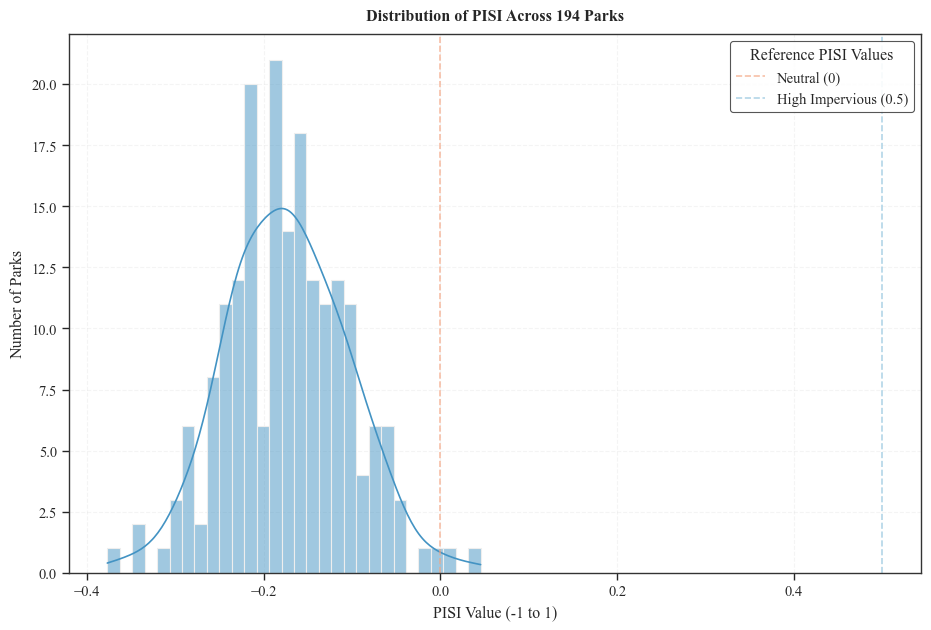

In [93]:
# Histogram of PISI
fig, ax = plt.subplots(figsize=(11, 7))
sns.histplot(data=parks_gdf, x='pisi_mean', bins=30, color=Colors[0], kde=True, ax=ax)
ax.set_title('Distribution of PISI Across 194 Parks', pad=10)
ax.set_xlabel('PISI Value (-1 to 1)')
ax.set_ylabel('Number of Parks')
ax.grid(True, linestyle='--', alpha=0.2)
# Highlight key thresholds
ax.axvline(0, color=Colors[1], linestyle='--', alpha=0.7, label='Neutral (0)')
ax.axvline(0.5, color=Colors[2], linestyle='--', alpha=0.7, label='High Impervious (0.5)')
ax.legend(title='Reference PISI Values', loc='best')
# plt.savefig('pisi_distribution.png', dpi=600, bbox_inches='tight')  # Comment out export
plt.show()

In [83]:
# 2. Vegetation characteristics
ndvi = parks_gdf['ndvi_mean']
pisi = parks_gdf['pisi_mean']
high_ndvi_pct = (ndvi > 0.2).sum() / len(ndvi) * 100

print(f"\nNDVI (greenness): {np.mean(ndvi):.2f} ± {np.std(ndvi):.2f}")
print(f"Impervious surfaces (PISI): {np.mean(pisi):.2f} ± {np.std(pisi):.2f}")
print(f"Parks with NDVI >0.2: {high_ndvi_pct:.1f}%")


NDVI (greenness): 0.15 ± 0.04
Impervious surfaces (PISI): -0.17 ± 0.07
Parks with NDVI >0.2: 8.2%


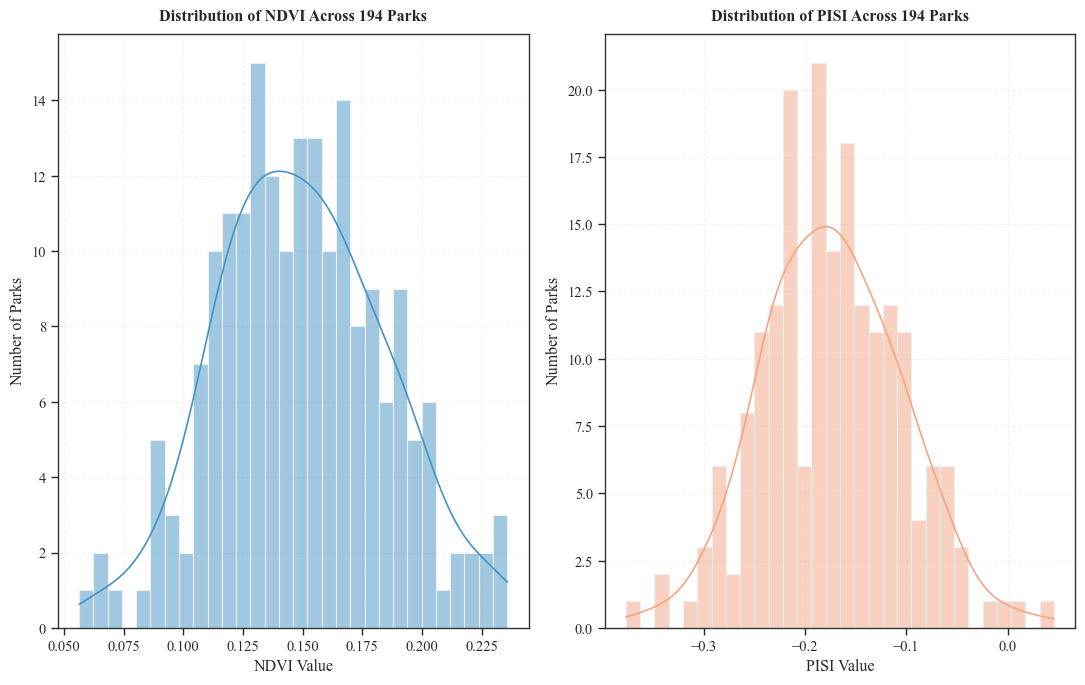

In [86]:
# Histograms
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 7))
sns.histplot(data=parks_gdf, x='ndvi_mean', bins=30, color=Colors[0], kde=True, ax=ax1)
ax1.set_title('Distribution of NDVI Across 194 Parks', pad=10)
ax1.set_xlabel('NDVI Value')
ax1.set_ylabel('Number of Parks')
ax1.grid(True, linestyle='--', alpha=0.2)

sns.histplot(data=parks_gdf, x='pisi_mean', bins=30, color=Colors[1], kde=True, ax=ax2)
ax2.set_title('Distribution of PISI Across 194 Parks', pad=10)
ax2.set_xlabel('PISI Value')
ax2.set_ylabel('Number of Parks')
ax2.grid(True, linestyle='--', alpha=0.2)

plt.tight_layout()
# plt.savefig('ndvi_pisi_distributions.png', dpi=600, bbox_inches='tight')  # Comment out export
plt.show()

### Built environment related exploration

In [80]:
# 3. Built environment metrics
bldg_density = parks_gdf['building_density']
bldg_proximity = parks_gdf['building_proximity']

print(f"\nBuilding density: {np.mean(bldg_density):.1f} ± {np.std(bldg_density):.1f} buildings/ha")
print(f"Building proximity: {np.median(bldg_proximity):.1f} m (IQR: "
      f"{np.percentile(bldg_proximity, 25):.1f}-{np.percentile(bldg_proximity, 75):.1f} m)")



Building density: 32.5 ± 7.9 buildings/ha
Building proximity: 15.8 m (IQR: 11.4-20.7 m)


In [87]:
# Descriptive Statistics
bldg_density_stats = bldg_density.describe()
bldg_proximity_stats = bldg_proximity.describe()
print("Building Density Descriptive Statistics (%):")
print(bldg_density_stats)
print(f"Range: {bldg_density.min():.2f}% to {bldg_density.max():.2f}%")
print("\nBuilding Proximity Descriptive Statistics (m):")
print(bldg_proximity_stats)
print(f"Range: {bldg_proximity.min():.2f}m to {bldg_proximity.max():.2f}m")

Building Density Descriptive Statistics (%):
count    194.000000
mean      32.540256
std        7.907630
min        1.359572
25%       28.403743
50%       33.158802
75%       37.660383
max       52.980830
Name: building_density, dtype: float64
Range: 1.36% to 52.98%

Building Proximity Descriptive Statistics (m):
count    194.000000
mean      17.870162
std       11.958802
min        1.620812
25%       11.352582
50%       15.768115
75%       20.725466
max       96.376621
Name: building_proximity, dtype: float64
Range: 1.62m to 96.38m


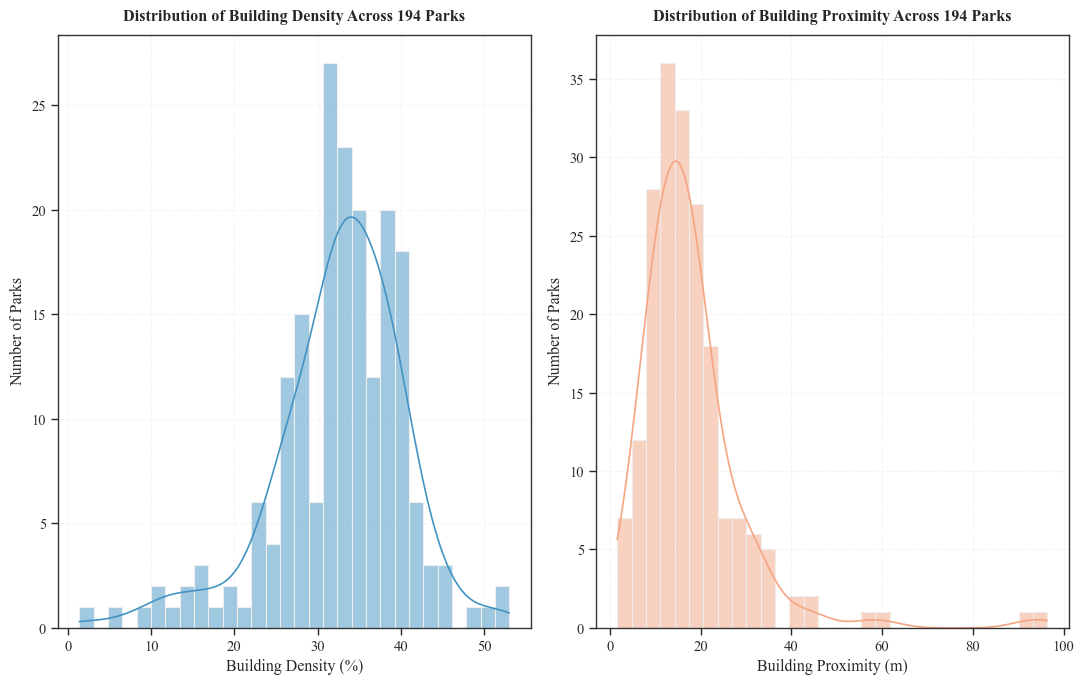

In [88]:
# Histograms
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 7))
sns.histplot(data=parks_gdf, x='building_density', bins=30, color=Colors[0], kde=True, ax=ax1)
ax1.set_title('Distribution of Building Density Across 194 Parks', pad=10)
ax1.set_xlabel('Building Density (%)')
ax1.set_ylabel('Number of Parks')
ax1.grid(True, linestyle='--', alpha=0.2)

sns.histplot(data=parks_gdf, x='building_proximity', bins=30, color=Colors[1], kde=True, ax=ax2)
ax2.set_title('Distribution of Building Proximity Across 194 Parks', pad=10)
ax2.set_xlabel('Building Proximity (m)')
ax2.set_ylabel('Number of Parks')
ax2.grid(True, linestyle='--', alpha=0.2)

plt.tight_layout()
# plt.savefig('bldg_density_proximity_distributions.png', dpi=600, bbox_inches='tight')  # Comment out export
plt.show()

## 3. Cooling Reduction

In [95]:
# Descriptive Statistics of Cooling Metrics
cooling_metrics = ['PCI', 'PCA', 'PCE', 'lst_reduction']
units = ['°C', 'm²', '', '°C']
stats_df = pd.DataFrame(index=['Mean', 'Min', 'Max', 'SD'], columns=cooling_metrics)
for metric in cooling_metrics:
    stats_df.loc['Mean', metric] = parks_gdf[metric].mean()
    stats_df.loc['Min', metric] = parks_gdf[metric].min()
    stats_df.loc['Max', metric] = parks_gdf[metric].max()
    stats_df.loc['SD', metric] = parks_gdf[metric].std()
print("Cooling Metrics Summary (Raw Units):\n", stats_df.round(2))

Cooling Metrics Summary (Raw Units):
            PCI            PCA        PCE lst_reduction
Mean   0.51261   48527.212756  10.317871      0.463619
Min  -1.956827    8941.278478   0.384186     -1.199007
Max   6.950153  133933.704782  41.708454      6.679984
SD    0.970277   18877.056199   8.345576      0.808022


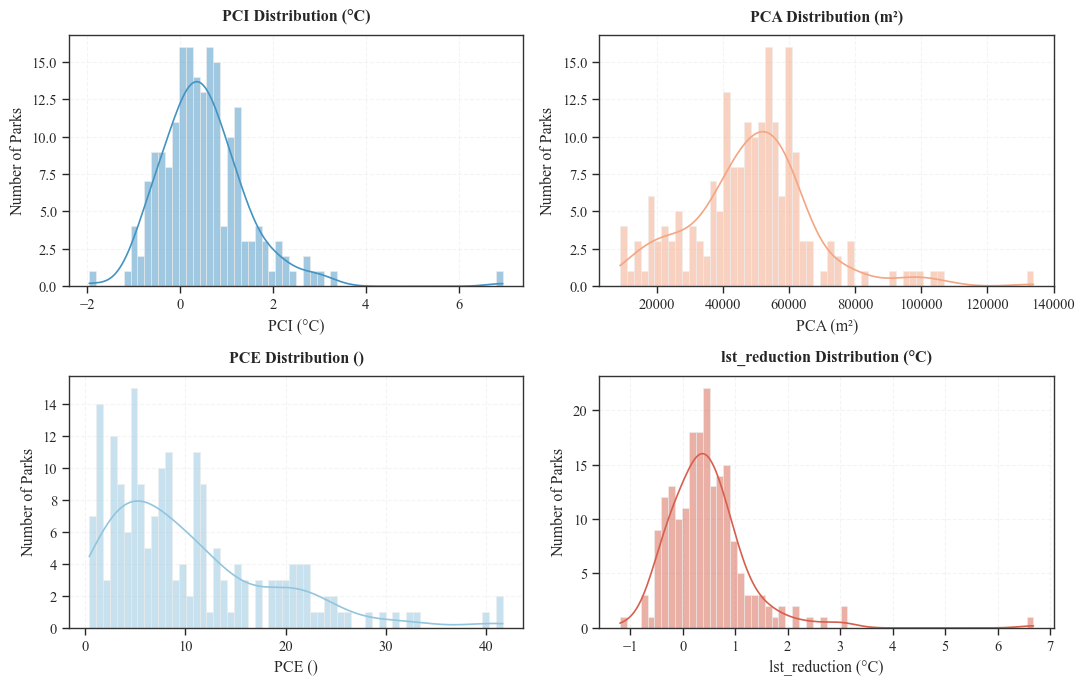

In [103]:
# Histograms of Cooling Metrics
fig, axes = plt.subplots(2, 2, figsize=(11, 7))
for ax, metric, unit, color in zip(axes.flatten(), cooling_metrics, units, Colors[:4]):
    sns.histplot(data=parks_gdf, x=metric, bins=30, color=color, kde=True, ax=ax)
    ax.set_title(f'{metric} Distribution ({unit})', pad=10)
    ax.set_xlabel(f'{metric} ({unit})')
    ax.set_ylabel('Number of Parks')
    ax.grid(True, linestyle='--', alpha=0.2)
plt.tight_layout()
# plt.savefig('cooling_effects_distributions.png', dpi=600, bbox_inches='tight')  # Comment out export
plt.show()

In [102]:
# Threshold Analysis (Quartile Binning) - Updated to suppress FutureWarning
for metric in cooling_metrics:
    parks_gdf[f'{metric}_quartile'] = pd.qcut(parks_gdf[metric], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
    print(f"\n{metric} Threshold Summary (Raw Units):")
    grouped = parks_gdf.groupby(f'{metric}_quartile', observed=False)[metric].agg(['mean', 'std']).round(2)
    ci_low, ci_high = stats.t.interval(0.95, len(parks_gdf)-1, loc=grouped['mean'], scale=grouped['std']/np.sqrt(len(parks_gdf)))
    print(pd.DataFrame({'Mean': grouped['mean'], '95% CI Low': ci_low, '95% CI High': ci_high}))


PCI Threshold Summary (Raw Units):
              Mean  95% CI Low  95% CI High
PCI_quartile                               
Q1           -0.51   -0.559562    -0.460438
Q2            0.18    0.160175     0.199825
Q3            0.66    0.638759     0.681241
Q4            1.72    1.584059     1.855941

PCA Threshold Summary (Raw Units):
                  Mean    95% CI Low   95% CI High
PCA_quartile                                      
Q1            25362.43  24122.423335  26602.436665
Q2            44421.91  43980.256245  44863.563755
Q3            53759.22  53429.760014  54088.679986
Q4            70588.28  68338.376474  72838.183526

PCE Threshold Summary (Raw Units):
               Mean  95% CI Low  95% CI High
PCE_quartile                                
Q1             2.26    2.105650     2.414350
Q2             6.00    5.844234     6.155766
Q3            10.65   10.412103    10.887897
Q4            22.28   21.341158    23.218842

lst_reduction Threshold Summary (Raw Units):
      

Investigation of lst_reduction

In [106]:
# Descriptive Statistics and Quartiles for lst_reduction
lst_stats = parks_gdf['lst_reduction'].describe()
q3 = parks_gdf['lst_reduction'].quantile(0.75)
top_quartile = parks_gdf[parks_gdf['lst_reduction'] >= q3]['lst_reduction']
top_quartile_mean = top_quartile.mean()

print("LST Reduction Descriptive Statistics:")
print(lst_stats.round(2))
print(f"\nTop Quartile Threshold (Q3): {q3:.2f}°C")
print(f"Top Quartile Mean: {top_quartile_mean:.2f}°C")


LST Reduction Descriptive Statistics:
count    194.00
mean       0.46
std        0.81
min       -1.20
25%       -0.02
50%        0.38
75%        0.78
max        6.68
Name: lst_reduction, dtype: float64

Top Quartile Threshold (Q3): 0.78°C
Top Quartile Mean: 1.41°C


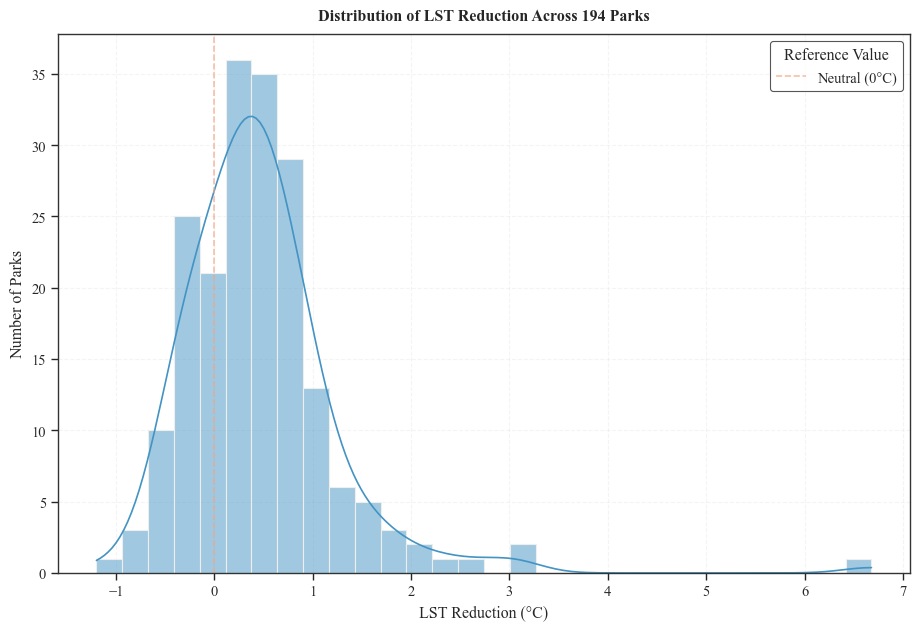

In [108]:
# Histogram of lst_reduction
fig, ax = plt.subplots(figsize=(11, 7))
sns.histplot(data=parks_gdf, x='lst_reduction', bins=30, color=Colors[0], kde=True, ax=ax)
ax.set_title('Distribution of LST Reduction Across 194 Parks', pad=10)
ax.set_xlabel('LST Reduction (°C)')
ax.set_ylabel('Number of Parks')
ax.grid(True, linestyle='--', alpha=0.2)
ax.axvline(0, color=Colors[1], linestyle='--', alpha=0.7, label='Neutral (0°C)')
ax.legend(title='Reference Value', loc='best')
# plt.savefig('lst_reduction_distribution.png', dpi=600, bbox_inches='tight')  # Comment out export
plt.show()

In [111]:
# Inverse Effect Parks (lst_reduction > 0)
inverse_parks = parks_gdf[parks_gdf['lst_reduction'] < 0]
inverse_count = len(inverse_parks)
inverse_pct = (inverse_count / len(parks_gdf)) * 100
inverse_mean = inverse_parks['lst_reduction'].mean()
inverse_max = inverse_parks['lst_reduction'].max()
inverse_min = inverse_parks['lst_reduction'].min()

print(f"Inverse Parks (Heating Effect) Count: {inverse_count} ({inverse_pct:.1f}%)")
print(f"Inverse Mean LST Increase: {inverse_mean:.2f}°C")
print(f"Inverse Range: {inverse_min:.2f}°C to {inverse_max:.2f}°C")

# Summary of Key Factors in Inverse Parks
key_factors = ['ndvi_mean', 'pisi_mean', 'LSI', 'building_density', 'building_proximity', 'area_m2']
inverse_factors = inverse_parks[key_factors].describe().round(2)
print("\nKey Factors in Inverse Parks Summary:\n", inverse_factors)


Inverse Parks (Heating Effect) Count: 51 (26.3%)
Inverse Mean LST Increase: -0.30°C
Inverse Range: -1.20°C to -0.00°C

Key Factors in Inverse Parks Summary:
        ndvi_mean  pisi_mean    LSI  building_density  building_proximity  \
count      51.00      51.00  51.00             51.00               51.00   
mean        0.13      -0.15   1.21             31.71               18.80   
std         0.03       0.06   0.09              8.17                8.32   
min         0.07      -0.25   1.11              8.93                4.27   
25%         0.11      -0.19   1.14             27.84               12.22   
50%         0.13      -0.16   1.20             32.79               18.39   
75%         0.15      -0.11   1.23             37.48               22.73   
max         0.18       0.05   1.51             44.92               45.75   

        area_m2  
count     51.00  
mean    8184.06  
std    12809.06  
min      986.45  
25%     2860.34  
50%     4686.36  
75%     6754.80  
max    64641.

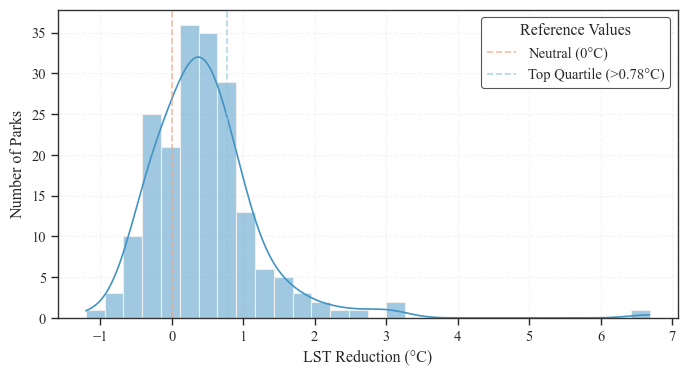

In [118]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.histplot(data=parks_gdf, x='lst_reduction', bins=30, color=Colors[0], kde=True, ax=ax)
# ax.set_title('Distribution of LST Reduction Across 194 Parks (°C)', pad=10)
ax.set_xlabel('LST Reduction (°C)')
ax.set_ylabel('Number of Parks')
ax.grid(True, linestyle='--', alpha=0.2)
ax.axvline(0, color=Colors[1], linestyle='--', alpha=0.7, label='Neutral (0°C)')
ax.axvline(0.78, color=Colors[2], linestyle='--', alpha=0.7, label='Top Quartile (>0.78°C)')
ax.legend(title='Reference Values', loc='best')
plt.savefig('lst_reduction_distribution.png', dpi=600, bbox_inches='tight')  # Comment out export
plt.show()

In [105]:
for metric in ['lst_reduction', 'PCI']:
    parks_gdf[f'{metric}_quartile'] = pd.qcut(parks_gdf[metric], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
    grouped = parks_gdf.groupby(f'{metric}_quartile', observed=False)[metric].agg(['mean', 'std']).round(2)
    ci_low, ci_high = stats.t.interval(0.95, len(parks_gdf)-1, loc=grouped['mean'], scale=grouped['std']/np.sqrt(len(parks_gdf)))
    print(f"{metric} Threshold Summary:\n", pd.DataFrame({'Mean': grouped['mean'], '95% CI Low': ci_low, '95% CI High': ci_high}))

lst_reduction Threshold Summary:
                         Mean  95% CI Low  95% CI High
lst_reduction_quartile                               
Q1                     -0.32   -0.352569    -0.287431
Q2                      0.21    0.193007     0.226993
Q3                      0.55    0.533007     0.566993
Q4                      1.41    1.272643     1.547357
PCI Threshold Summary:
               Mean  95% CI Low  95% CI High
PCI_quartile                               
Q1           -0.51   -0.559562    -0.460438
Q2            0.18    0.160175     0.199825
Q3            0.66    0.638759     0.681241
Q4            1.72    1.584059     1.855941


In [26]:
# 4. Cooling performance metrics
lst_reduction = parks_gdf['lst_reduction']
pci = parks_gdf['PCI']
pce = parks_gdf['PCE']

top_25_threshold = np.percentile(lst_reduction, 75)
pce_range = np.max(pce) - np.min(pce)

print(f"\nLST reduction: {np.mean(lst_reduction):.2f} ± {np.std(lst_reduction):.2f}°C")
print(f"Top 25% cooling performance: >{top_25_threshold:.1f}°C")
print(f"Cooling efficiency (PCE) range: {np.min(pce):.1f} - {np.max(pce):.1f}°C/m² "
      f"({pce_range/np.min(pce):.0f}x variation)")


LST reduction: 0.46 ± 0.81°C
Top 25% cooling performance: >0.8°C
Cooling efficiency (PCE) range: 0.4 - 41.7°C/m² (108x variation)


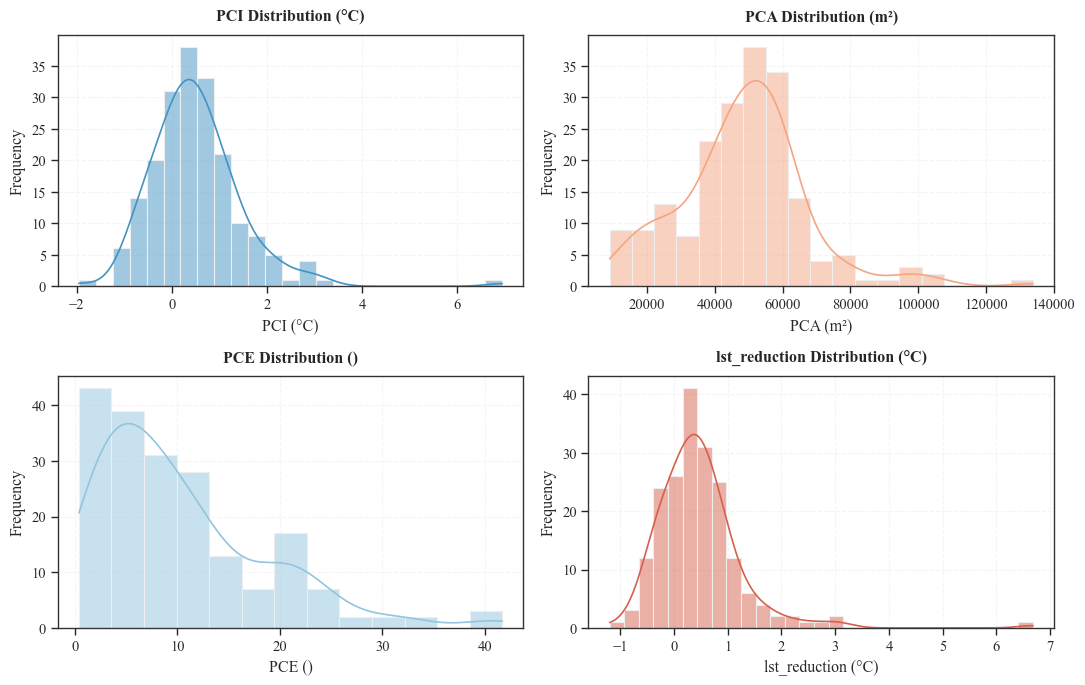

In [75]:
#Visualize Distributions
metrics = ['PCI', 'PCA', 'PCE', 'lst_reduction']
units = ['°C', 'm²', '', '°C']
fig, axes = plt.subplots(2, 2, figsize=(11, 7))
for ax, metric, unit, color in zip(axes.flatten(), metrics, units, Colors[:4]):  # Use first 4 colors
    sns.histplot(data=parks_gdf, x=metric, ax=ax, kde=True, color=color)
    ax.set_title(f'{metric} Distribution ({unit})', pad=10)
    ax.set_xlabel(f'{metric} ({unit})')
    ax.set_ylabel('Frequency')
    ax.grid(True, linestyle='--', alpha=0.2)
plt.tight_layout()
# plt.savefig('cooling_metrics_distributions_custom.png')
plt.show()  # Close to free memory

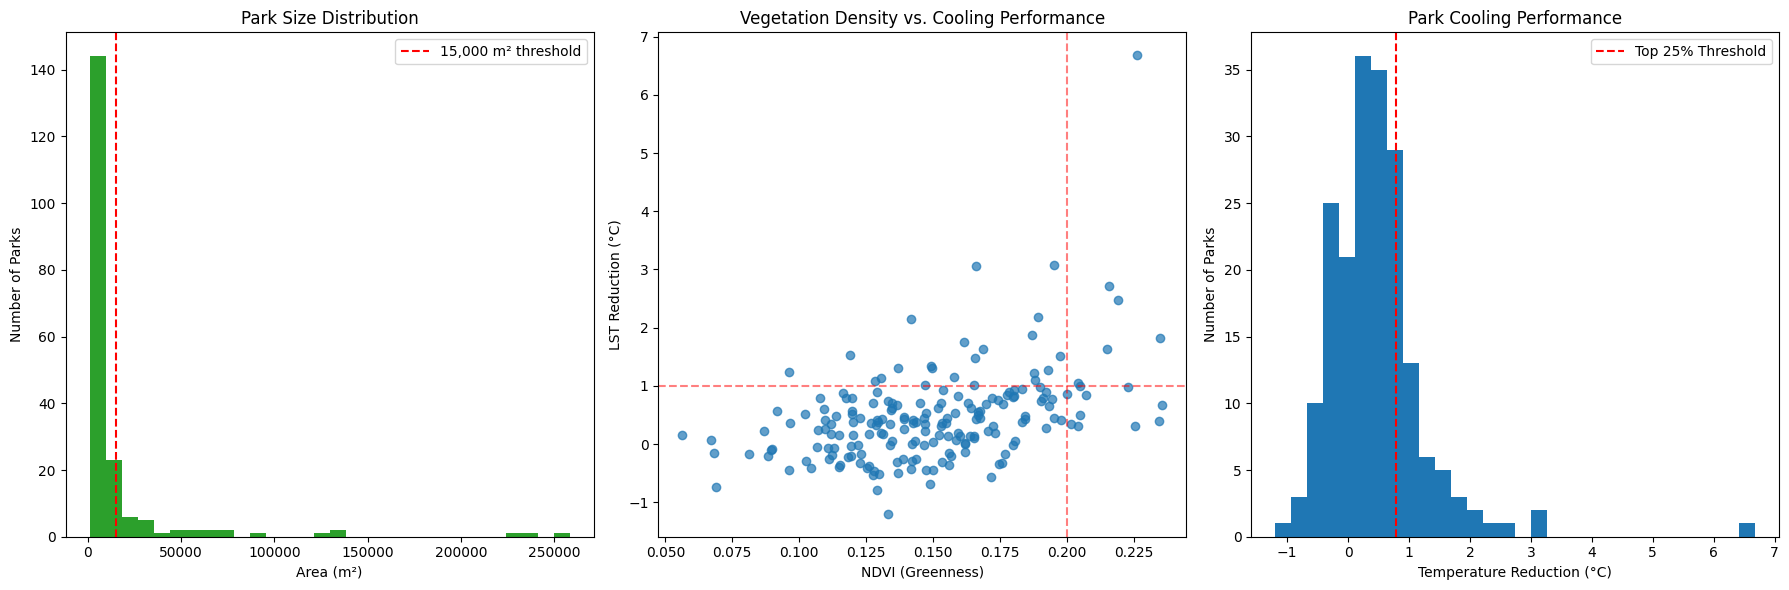

In [27]:
# Generate supporting visualizations
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Park size distribution
ax[0].hist(area_m2, bins=30, color='#2ca02c')
ax[0].axvline(15000, color='red', linestyle='--', label='15,000 m² threshold')
ax[0].set_title('Park Size Distribution')
ax[0].set_xlabel('Area (m²)')
ax[0].set_ylabel('Number of Parks')
ax[0].legend()

# NDVI vs. Cooling performance
ax[1].scatter(ndvi, lst_reduction, c='#1f77b4', alpha=0.7)
ax[1].set_title('Vegetation Density vs. Cooling Performance')
ax[1].set_xlabel('NDVI (Greenness)')
ax[1].set_ylabel('LST Reduction (°C)')
ax[1].axhline(y=1.0, color='red', linestyle='--', alpha=0.5)
ax[1].axvline(x=0.2, color='red', linestyle='--', alpha=0.5)

# Cooling performance distribution
ax[2].hist(lst_reduction, bins=30, color='#1f77b4')
ax[2].axvline(top_25_threshold, color='red', linestyle='--', label='Top 25% Threshold')
ax[2].set_title('Park Cooling Performance')
ax[2].set_xlabel('Temperature Reduction (°C)')
ax[2].set_ylabel('Number of Parks')
ax[2].legend()

plt.tight_layout()
plt.savefig('descriptive_stats_summary.png', dpi=300)
plt.show()

# 2. Summary Statistics of Cooling Metrics (Raw Units)


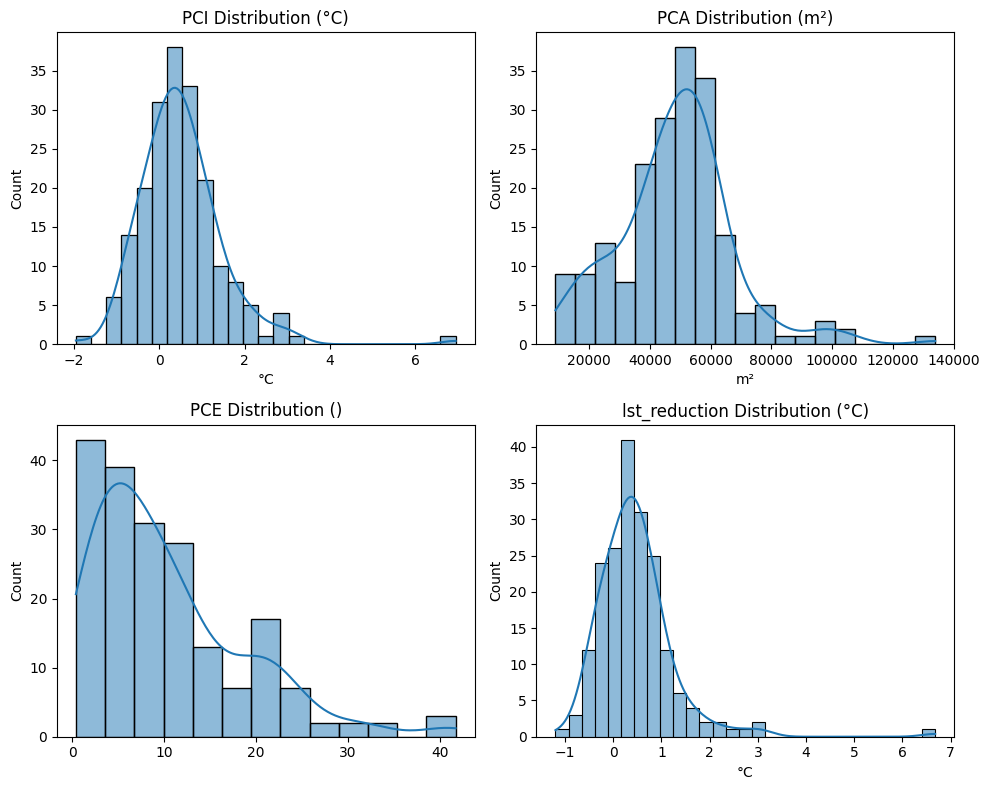

In [8]:
# Visualize Distributions
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
for ax, metric, unit in zip(axes.flatten(), metrics, ['°C', 'm²', '', '°C']):
    sns.histplot(parks_gdf[metric], ax=ax, kde=True)
    ax.set_title(f'{metric} Distribution ({unit})')
    ax.set_xlabel(unit)
plt.tight_layout()
# plt.savefig('cooling_metrics_distributions_raw.png')

2. Factor Influences (Local Coefficients in Raw Units)

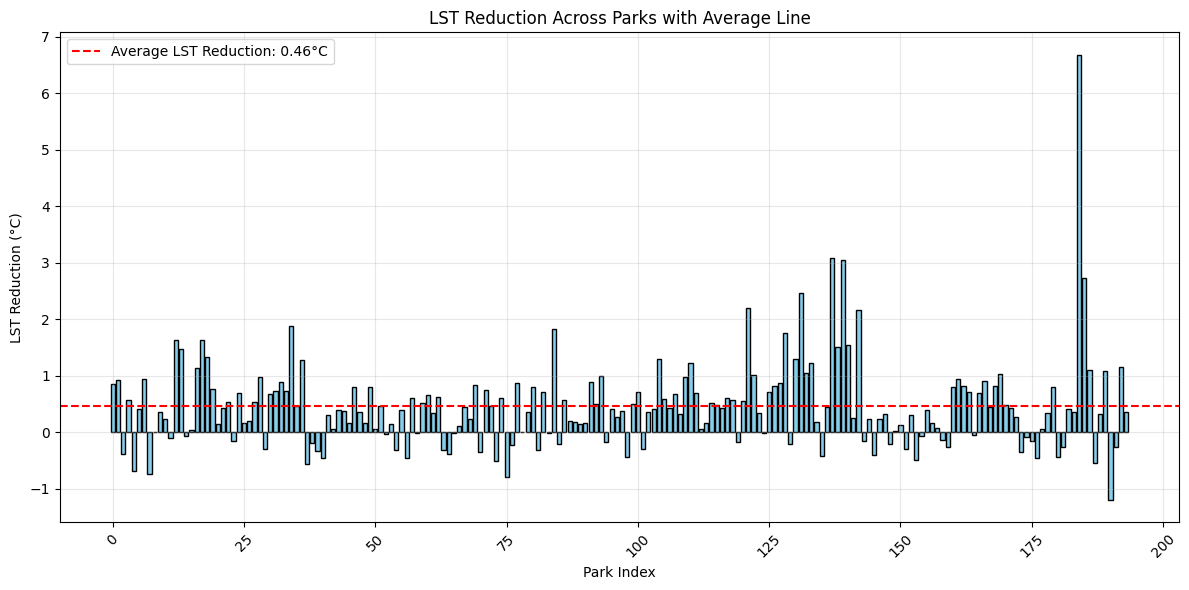

In [4]:

# Calculate the mean LST reduction
mean_lst_reduction = parks_gdf['lst_reduction'].mean()

# Create the bar graph
plt.figure(figsize=(12, 6))
plt.bar(range(len(parks_gdf)), parks_gdf['lst_reduction'], color='skyblue', edgecolor='black')
plt.axhline(y=mean_lst_reduction, color='red', linestyle='--', label=f'Average LST Reduction: {mean_lst_reduction:.2f}°C')

# Customize the plot
plt.xlabel('Park Index')
plt.ylabel('LST Reduction (°C)')
plt.title('LST Reduction Across Parks with Average Line')
plt.legend()
plt.grid(True, alpha=0.3)

# Rotate x-axis labels for readability if needed (optional)
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
# Assume parks_relevant_gdf is loaded
mean_coefs = parks_gdf[[col for col in parks_gdf.columns if 'coef' in col and 'lst_reduction' in col]].mean()
mean_tvals = parks_gdf[[col for col in parks_gdf.columns if 'tval' in col and 'lst_reduction' in col]].mean()
significant_factors = {k.split('_coef_')[1]: v for k, v in mean_coefs.items() if abs(mean_tvals[f'lst_reduction_tval_{k.split("_coef_")[1]}']) > 1.96}
print("Most Impactful Factors (Mean Coefficients with Significant t-values):")
print(significant_factors)

In [ ]:
import matplotlib.pyplot as plt
factors = ['const', 'log_area_m2', 'ndvi_mean', 'pisi_mean', 'building_proximity']
coefs = [0.4585, 0.4860, 0.4528, 0.2298, -0.3823]  # From output
plt.bar(factors, coefs, color=['blue' if x > 0 else 'red' for x in coefs])
plt.title('Impactful Factors on LST Reduction (Mean Coefficients)')
plt.xlabel('Predictors')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45)
for i, v in enumerate(coefs):
    plt.text(i, v, f'{v:.3f}', ha='center', va='bottom' if v > 0 else 'top')
plt.show()

In [ ]:
#avg internal red:
print(f"Average LST Reduction: {parks_gdf['lst_reduction'].mean():.2f}°C")


In [ ]:
# avg external metrics
print(f"Average PCI: {parks_gdf['PCI'].mean():.2f}°C")
print(f"Average PCA: {parks_gdf['PCA'].mean():.0f}m²")
print(f"Average PCE: {parks_gdf['PCE'].mean():.2f}")
print(f"Average PCD: {parks_gdf['PCD'].mean():.2f}")

In [ ]:
# Calculate percentage of parks with cooling effect
total_parks = len(parks_gdf)
cooling_parks = len(parks_gdf[parks_gdf['PCI'] < 0])
cooling_percentage = (cooling_parks / total_parks) * 100
print(f"Percentage of Parks with Cooling Effect (PCI > 0): {cooling_percentage:.1f}%")
print(f"Number of Cooling Parks: {cooling_parks}, Total Parks: {total_parks}")

Heating_parks = len(parks_gdf[parks_gdf['PCI'] > 0])
Heating_percentage = (Heating_parks / total_parks) * 100
print(f"Percentage of Parks with Heating Effect (PCI > 0): {Heating_percentage:.1f}%")
print(f"Number of Cooling Parks: {Heating_parks}, Total Parks: {total_parks}")